## MACHINE LEARNING - 2 - Assignment
## By Prakash Ghosh
---

### 1. Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.
#### Here is the code to load the data

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

* Solution

In [21]:
print(" The keys of boston dataset:\t",boston.keys())
print("\n Dataset shape:\t",boston.data.shape)
print("\n Fetures (columns) of Dataset:\t",boston.feature_names)

print('\n First Five Rows:')
bos.head(5)

 The keys of boston dataset:	 dict_keys(['data', 'target', 'feature_names', 'DESCR'])

 Dataset shape:	 (506, 13)

 Fetures (columns) of Dataset:	 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

 First Five Rows:


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
# Description of Boston Dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [26]:
#Assign Columns names to Boston DataFrame using feature names
bos.columns=boston.feature_names
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
# Add target to Boston DataFrame as 'PRICE'
bos['PRICE']=boston.target
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


* Linear regression using least square method

In [61]:
df_feature = bos.iloc[:,:-1]       # Select all features (cloumns) except "PRICE" column
df_price =  bos.iloc[:,-1:]        # Select "PRICE" column 

In [68]:
# import librarie for LinearRegression model
from sklearn.linear_model import LinearRegression as lr
lr_model = lr()

lr_model.fit(df_feature,df_price)                        # Fit the data
lr_model_R_square =lr_model.score(df_feature,df_price)   # Calculate the R square

lr_model_price_pred = lr_model.predict(df_feature)   # Prediction of Price based on features (Training data) 

print(" R-square:\t", lr_model_R_square)
print("\n The Estimated Intercept:\t", lr_model.intercept_[0])
print("\n No. of Estimated coefficients :", len(lr_model.coef_[0]), "\n" )
print("\n The Predicted Prices based on features: \n",lr_model_price_pred[0:10])

 R-square:	 0.7406077428649428

 The Estimated Intercept:	 36.49110328036135

 No. of Estimated coefficients : 13 


 The Predicted Prices based on features: 
 [[30.00821269]
 [25.0298606 ]
 [30.5702317 ]
 [28.60814055]
 [27.94288232]
 [25.25940048]
 [23.00433994]
 [19.5347558 ]
 [11.51696539]
 [18.91981483]]


In [71]:
# Features and their estimated coefficients
df_lr_coef= pd.DataFrame(list(zip(df_feature.columns, lr_model.coef_[0])), columns=['Features','Estimated_Coefficients'])
print("Features and their estimated coefficients")
df_lr_coef

Features and their estimated coefficients


,Features,Estimated_Coefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


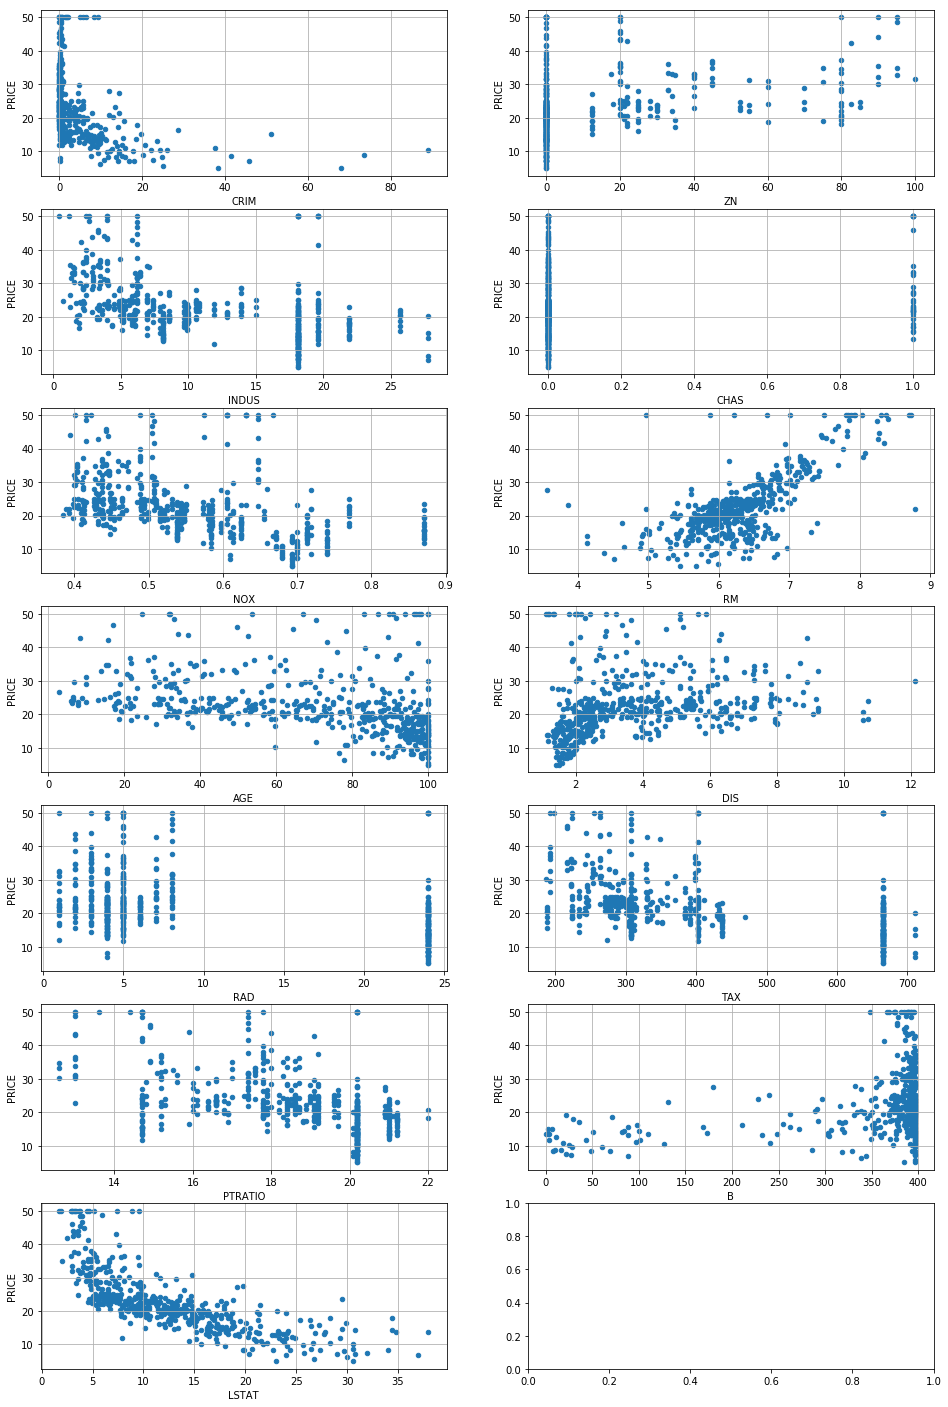

In [72]:
# Correlation between Target variable (PRICE) and Fatures 
fig, axs = plt.subplots(7, 2 , sharey=False)
bos.plot(kind='scatter', x=bos.columns[0], y='PRICE', ax=axs[0][0] , figsize=(16,25) , grid=True )
bos.plot(kind='scatter', x=bos.columns[1], y='PRICE', ax=axs[0][1], grid=True)
bos.plot(kind='scatter', x=bos.columns[2], y='PRICE', ax=axs[1][0], grid=True)
bos.plot(kind='scatter', x=bos.columns[3], y='PRICE', ax=axs[1][1], grid=True)
bos.plot(kind='scatter', x=bos.columns[4], y='PRICE', ax=axs[2][0], grid=True)
bos.plot(kind='scatter', x=bos.columns[5], y='PRICE', ax=axs[2][1], grid=True)
bos.plot(kind='scatter', x=bos.columns[6], y='PRICE', ax=axs[3][0], grid=True)
bos.plot(kind='scatter', x=bos.columns[7], y='PRICE', ax=axs[3][1], grid=True)
bos.plot(kind='scatter', x=bos.columns[8], y='PRICE', ax=axs[4][0], grid=True)
bos.plot(kind='scatter', x=bos.columns[9], y='PRICE', ax=axs[4][1], grid=True)
bos.plot(kind='scatter', x=bos.columns[10], y='PRICE', ax=axs[5][0], grid=True)
bos.plot(kind='scatter', x=bos.columns[11], y='PRICE', ax=axs[5][1], grid=True)
bos.plot(kind='scatter', x=bos.columns[12], y='PRICE', ax=axs[6][0], grid=True)
plt.show()

In [78]:
# Calulation of mean square error
mean_square_error = np.mean((bos['PRICE'] - lr_model.predict(df_feature).flatten())**2)
print("Mean Squared Error:\t\t",mean_square_error)
# Residual sum of squares
residual_square_error = np.sum((bos.PRICE - lr_model.predict(df_feature).flatten()) ** 2)
print("Residual Sum of Squares:\t", residual_square_error)

Mean Squared Error:		 21.897779217687496
Residual Sum of Squares:	 11080.276284149873


In [81]:
# import regression libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [86]:
# statistical analysis of the linear regression model
bos_ols = ols(formula='PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + PRICE ', \
              data=bos).fit() 
            # Pass the feature to create the formula for Ordinary least squares
print(' Statistical Analysis:', bos_ols.summary())

 Statistical Analysis:                             OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.603e+30
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:06:52   Log-Likelihood:                 15214.
No. Observations:                 506   AIC:                        -3.040e+04
Df Residuals:                     491   BIC:                        -3.033e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.132e-14   2.43e

Actual Price vs Predictd Price


Text(0,0.5,'Predictd Price')

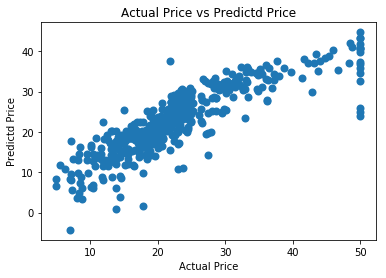

In [93]:
# Scatter plot between Actual Price Data and Predictd Price 
print("Actual Price vs Predictd Price")
fig = plt.figure()
plt.title('Actual Price vs Predictd Price')
plt.scatter(bos['PRICE'],lr_model.predict(df_feature) ,  linewidths=2)
plt.xlabel("Actual Price")
plt.ylabel("Predictd Price")

Text(0.5,1,'Actual Price vs Predictd fittedvalues')

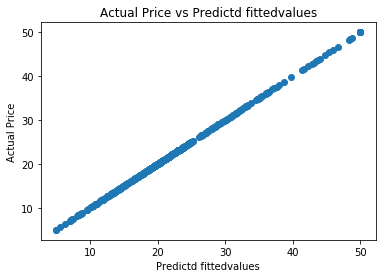

In [94]:
# Scatter plot between Actual Price Data and Predictd fittedvalues
plt.scatter(bos_ols.fittedvalues, bos.PRICE)
plt.xlabel("Predictd fittedvalues")
plt.ylabel("Actual Price")
plt.title("Actual Price vs Predictd fittedvalues")

In [96]:
print("R-sqaure value:\t\t\t",bos_ols.rsquared )
print("Adjusted R-sqaure value:\t",bos_ols.rsquared_adj)

R-sqaure value:			 1.0
Adjusted R-sqaure value:	 1.0
